# **Customer Segmentation**
**Problem Statement:** XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

**ML Problem:** ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('custt_seg.csv',sep=',',index_col=False,dtype='unicode')

**Week 8: Data understanding(number of NA values, outliers , skewed etc)**

*   changing some column names
*   fixing incorret data types
*   deleting unnecessary column

In [68]:
data.head()

,ıd,fecha_dato,cust_code,employee_index,custom_country_residence,sexo,age,date_regist,new_cust_ındex,cust_seniority,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,a_pension,direct_debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-28,0.0,6,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-28,1050611,N,ES,V,23,2015-01-28,0.0,35,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-01-28,1050612,N,ES,V,23,2015-01-28,0.0,35,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-01-28,1050613,N,ES,H,22,2015-01-28,0.0,35,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-28,1050614,N,ES,V,23,2015-01-28,0.0,35,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(1000000, 48)

In [5]:
#deleting unnecessary column
data.drop('ult_fec_cli_1t',axis=1, inplace=True)
data.drop('conyuemp',axis=1, inplace=True)
data.drop('ind_aval_fin_ult1',axis=1, inplace=True)

In [6]:
#changing some column name
data.rename({'ncodpers':'cust_code', 'ind_empleado':'employee_index', 'fecha_alta': 'date_regist'}, axis=1, inplace=True)
data.rename({'Unnamed: 0':'ıd','pais_residencia':'custom_country_residence', 'ind_nuevo':'new_cust_ındex', 'antiguedad':'cust_seniority'}, axis=1, inplace=True)
data.rename({'indrel':'primary_cust', 'ult_fec_cli_1t':'last_data_primary_cust', 'indrel_1mes': 'cust_type'}, axis=1, inplace=True)
data.rename({'tiprel_1mes':'cust_relation_type', 'indresi':'residence_index', 'indext': 'foreigner_index'}, axis=1, inplace=True)
data.rename({'conyuemp':'spouse_index', 'canal_entrada':'channel', 'indfall':'deceased_index','tipodom':'addres_type'}, axis=1, inplace=True)
data.rename({'nomprov':'province_name', 'ind_actividad_cliente':'activity_index', 'renta': 'gross_income','ind_ahor_fin_ult1':'save_account'}, axis=1, inplace=True)
data.rename({'ind_cco_fin_ult1':'current_account', 'ind_cder_fin_ult1':'derivada_account', 'ind_cno_fin_ult1':'payroll_account','ind_ctju_fin_ult1':'junior_account'}, axis=1, inplace=True)
data.rename({'ind_ctma_fin_ult1':'mas_particu_account', 'ind_ctop_fin_ult1':'particu_account','ind_ctpp_fin_ult1':'particu_plus_account'}, axis=1, inplace=True)
data.rename({'ind_deco_fin_ult1':'short_term_deposit', 'ind_deme_fin_ult1':'medium_term_deposit', 'ind_dela_fin_ult1':'long_term_deposit','ind_ecue_fin_ult1':'e_account'}, axis=1, inplace=True)
data.rename({'ind_fond_fin_ult1':'funds', 'ind_hip_fin_ult1':'mortgage', 'ind_plan_fin_ult1':'pensions','ind_pres_fin_ult1':'loans'}, axis=1, inplace=True)
data.rename({'ind_reca_fin_ult1':'taxes', 'ind_tjcr_fin_ult1':'credit_card', 'ind_valo_fin_ult1':'securities','ind_viv_fin_ult1':'home_account'}, axis=1, inplace=True)
data.rename({'ind_nomina_ult1':'payroll', 'ind_nom_pens_ult1':'a_pension', 'ind_recibo_ult1':'direct_debit'}, axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ıd                        1000000 non-null  object
 1   fecha_dato                1000000 non-null  object
 2   cust_code                 1000000 non-null  object
 3   employee_index            989218 non-null   object
 4   custom_country_residence  989218 non-null   object
 5   sexo                      989214 non-null   object
 6   age                       989218 non-null   object
 7   date_regist               989218 non-null   object
 8   new_cust_ındex            989218 non-null   object
 9   cust_seniority            989218 non-null   object
 10  primary_cust              989218 non-null   object
 11  cust_type                 989218 non-null   object
 12  cust_relation_type        989218 non-null   object
 13  residence_index           989218 non-null  

In [8]:
data['residence_index']=data['residence_index'].replace('S','Yes').replace('N','No')
data['residence_index'].value_counts()

Yes    982264
No       6954
Name: residence_index, dtype: int64

In [9]:
data['fecha_dato']=pd.to_datetime(data['fecha_dato'],unit='ns')
data['date_regist']=pd.to_datetime(data['fecha_dato'],unit='ns')

<ipython-input-9-5f7ef62f3299>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['fecha_dato']=pd.to_datetime(data['fecha_dato'],unit='ns')


In [10]:
#Employee index: A active, B ex employed, F filial, N not employee, P pasive
print(data['employee_index'].value_counts())
print(data['employee_index'].isnull().sum())

N    988260
B       387
A       287
F       282
S         2
Name: employee_index, dtype: int64
10782


In [11]:
print(data['new_cust_ındex'].value_counts())
print(data['new_cust_ındex'].isnull().sum())

0    988734
1       484
Name: new_cust_ındex, dtype: int64
10782


In [12]:
#1(First/Primary), 99 (Primary customer during the month but not at the end of the month)
data['primary_cust'].value_counts()

1     988117
99      1101
Name: primary_cust, dtype: int64

In [13]:
data['cust_type'].value_counts()

1    989175
3        41
2         2
Name: cust_type, dtype: int64

In [14]:
print(data['cust_code'].isnull().sum())

0


In [15]:
#Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
print(data['cust_relation_type'].value_counts())
print(data['cust_relation_type'].isnull().sum())

A    547800
I    441377
P        41
Name: cust_relation_type, dtype: int64
10782


In [16]:
data['foreigner_index']=data['foreigner_index'].replace('S','Yes').replace('N','No')
print(data['foreigner_index'].value_counts())
print(data['foreigner_index'].isnull().sum())

No     946328
Yes     42890
Name: foreigner_index, dtype: int64
10782


In [17]:
print(data['deceased_index'].value_counts())
print(data['deceased_index'].isnull().sum())

N    986107
S      3111
Name: deceased_index, dtype: int64
10782


In [18]:
print(data['channel'].value_counts())
print(data['channel'].isnull().sum())

KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
        ...  
KDI         2
KDB         2
KBN         2
KGN         1
KGC         1
Name: channel, Length: 156, dtype: int64
10861


In [19]:
print(data['addres_type'].value_counts())
print(data['addres_type'].isnull().sum())
data['addres_type']

1    989218
Name: addres_type, dtype: int64
10782


0         1
1         1
2         1
3         1
4         1
         ..
999995    1
999996    1
999997    1
999998    1
999999    1
Name: addres_type, Length: 1000000, dtype: object

In [20]:
print(data['custom_country_residence'].value_counts())
print(data['custom_country_residence'].isnull().sum())

ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: custom_country_residence, Length: 113, dtype: int64
10782


In [21]:
print(data['activity_index'].value_counts())
print(data['activity_index'].isnull().sum())

1    558879
0    430339
Name: activity_index, dtype: int64
10782


In [22]:
print(data['save_account'].value_counts())
print(data['save_account'].isnull().sum())

0    999823
1       177
Name: save_account, dtype: int64
0


In [23]:
print(data['current_account'].value_counts())
print(data['current_account'].isnull().sum())

1    749626
0    250374
Name: current_account, dtype: int64
0


In [24]:
print(data['derivada_account'].value_counts())
print(data['derivada_account'].isnull().sum())

0    999409
1       591
Name: derivada_account, dtype: int64
0


In [25]:
print(data['payroll_account'].value_counts())
print(data['payroll_account'].isnull().sum())

0    894704
1    105296
Name: payroll_account, dtype: int64
0


In [26]:
print(data['junior_account'].value_counts())
print(data['junior_account'].isnull().sum())

0    986377
1     13623
Name: junior_account, dtype: int64
0


In [27]:
print(data['mas_particu_account'].value_counts())
print(data['mas_particu_account'].isnull().sum())

0    990106
1      9894
Name: mas_particu_account, dtype: int64
0


In [28]:
print(data['particu_account'].value_counts())
print(data['particu_account'].isnull().sum())

0    787514
1    212486
Name: particu_account, dtype: int64
0


In [29]:
print(data['particu_plus_account'].value_counts())
print(data['particu_plus_account'].isnull().sum())

0    927921
1     72079
Name: particu_plus_account, dtype: int64
0


In [30]:
print(data['short_term_deposit'].value_counts())
print(data['short_term_deposit'].isnull().sum())

0    997842
1      2158
Name: short_term_deposit, dtype: int64
0


In [31]:
print(data['medium_term_deposit'].value_counts())
print(data['medium_term_deposit'].isnull().sum())

0    996850
1      3150
Name: medium_term_deposit, dtype: int64
0


In [32]:
print(data['long_term_deposit'].value_counts())
print(data['long_term_deposit'].isnull().sum())

0    933119
1     66881
Name: long_term_deposit, dtype: int64
0


In [33]:
print(data['e_account'].value_counts())
print(data['e_account'].isnull().sum())

0    893733
1    106267
Name: e_account, dtype: int64
0


In [34]:
print(data['funds'].value_counts())
print(data['funds'].isnull().sum())

0    972818
1     27182
Name: funds, dtype: int64
0


In [35]:
print(data['mortgage'].value_counts())
print(data['mortgage'].isnull().sum())

0    990018
1      9982
Name: mortgage, dtype: int64
0


In [36]:
print(data['pensions'].value_counts())
print(data['pensions'].isnull().sum())

0    985447
1     14553
Name: pensions, dtype: int64
0


In [37]:
print(data['loans'].value_counts())
print(data['loans'].isnull().sum())

0    995339
1      4661
Name: loans, dtype: int64
0


In [38]:
print(data['taxes'].value_counts())
print(data['taxes'].isnull().sum())

0    927419
1     72581
Name: taxes, dtype: int64
0


In [39]:
print(data['credit_card'].value_counts())
print(data['credit_card'].isnull().sum())

0    933916
1     66084
Name: credit_card, dtype: int64
0


In [40]:
print(data['securities'].value_counts())
print(data['securities'].isnull().sum())

0    960622
1     39378
Name: securities, dtype: int64
0


In [41]:
print(data['home_account'].value_counts())
print(data['home_account'].isnull().sum())

0    993558
1      6442
Name: home_account, dtype: int64
0


In [42]:
print(data['payroll'].value_counts())
print(data['payroll'].isnull().sum())

0    923356
1     71242
Name: payroll, dtype: int64
5402


In [43]:
print(data['a_pension'].value_counts())
print(data['a_pension'].isnull().sum())

0    915485
1     79113
Name: a_pension, dtype: int64
5402


In [44]:
print(data['direct_debit'].value_counts())
print(data['direct_debit'].isnull().sum())

0    833725
1    166275
Name: direct_debit, dtype: int64
0


In [45]:
print(data['sexo'].value_counts())
print(data['sexo'].isnull().sum())

V    562000
H    427214
Name: sexo, dtype: int64
10786


In [46]:
print(data['province_name'].value_counts())
print(data['province_name'].isnull().sum())

MADRID                    360131
BARCELONA                  87372
VALENCIA                   46394
SEVILLA                    43922
CORUA                      27545
MALAGA                     26798
MURCIA                     24782
ZARAGOZA                   24621
ALICANTE                   20323
CADIZ                      20292
ASTURIAS                   18399
PONTEVEDRA                 17482
VALLADOLID                 16657
PALMAS                     15976
BIZKAIA                    15597
GRANADA                    12930
TOLEDO                     12131
BADAJOZ                    11909
CANTABRIA                  11264
SALAMANCA                  10650
CORDOBA                     9829
BALEARS                     8361
CACERES                     8347
HUELVA                      7923
CIUDAD REAL                 7782
ALBACETE                    7294
CASTELLON                   6711
NAVARRA                     6584
BURGOS                      6403
TARRAGONA                   6120
RIOJA     

In [47]:
print(data['cod_prov'].value_counts())
print(data['cod_prov'].isnull().sum())

28    360131
8      87372
46     46394
41     43922
15     27545
29     26798
30     24782
50     24621
3      20323
11     20292
33     18399
36     17482
47     16657
35     15976
48     15597
18     12930
45     12131
6      11909
39     11264
37     10650
14      9829
7       8361
10      8347
21      7923
13      7782
2       7294
12      6711
31      6584
9       6403
43      6120
26      5992
24      5968
17      5735
20      5708
27      5259
32      5151
38      5080
25      4846
23      4492
19      4327
4       4021
16      3768
34      3224
49      3213
40      2979
1       2878
22      2657
5       2573
44      1397
42      1179
52       764
51       526
Name: cod_prov, dtype: int64
17734


In [48]:
data[['cod_prov','province_name']]

,cod_prov,province_name
0,29,MALAGA
1,13,CIUDAD REAL
2,13,CIUDAD REAL
3,50,ZARAGOZA
4,50,ZARAGOZA
...,...,...
999995,28,MADRID
999996,15,CORUA
999997,15,CORUA
999998,28,MADRID


In [49]:
#g = data.dropna(subset=['province_name']).drop_duplicates('cod_prov').set_index('cod_prov')['province_name']
#data['cod_prov'] = data['cod_prov'].fillna(data['province_name'].map(g))

In [50]:
data['new_cust_ındex']=data['new_cust_ındex'].astype("float")
data['cust_seniority']=data['cust_seniority'].astype("float")
data['age']=data['age'].astype("float")
data['cust_type']=data['cust_type'].astype("float")
data['primary_cust']=data['primary_cust'].astype("float")
data['activity_index']=data['activity_index'].astype("float")
data['gross_income']=data['gross_income'].astype("float")

In [51]:
data['age'].head(264)

0      35.0
1      23.0
2      23.0
3      22.0
4      23.0
       ... 
259    22.0
260    23.0
261     NaN
262    25.0
263    23.0
Name: age, Length: 264, dtype: float64

In [52]:
data['cust_seniority']=data['cust_seniority'].fillna(data['cust_seniority'].mean())
data['cust_seniority'].head(264)

0       6.000000
1      35.000000
2      35.000000
3      35.000000
4      35.000000
         ...    
259    35.000000
260    35.000000
261    93.093975
262    35.000000
263    35.000000
Name: cust_seniority, Length: 264, dtype: float64

**Week 9: Data Cleaning**

https://www.kaggle.com/code/alexisbcook/handling-missing-values


*   data cleaning
*   outliers detection and treatment

In [53]:
missing_values=data.isnull().sum()
missing_values

ıd                               0
fecha_dato                       0
cust_code                        0
employee_index               10782
custom_country_residence     10782
sexo                         10786
age                          10782
date_regist                      0
new_cust_ındex               10782
cust_seniority                   0
primary_cust                 10782
cust_type                    10782
cust_relation_type           10782
residence_index              10782
foreigner_index              10782
channel                      10861
deceased_index               10782
addres_type                  10782
cod_prov                     17734
province_name                17734
activity_index               10782
gross_income                175183
save_account                     0
current_account                  0
derivada_account                 0
payroll_account                  0
junior_account                   0
mas_particu_account              0
particu_account     

In [54]:
# how many total missing values do we have?
total_count = np.product(data.shape)
total_missing_values = missing_values.sum()
print(total_missing_values)

# percent of data that is missing
percent_missing = (total_missing_values/total_count) * 100
print(percent_missing)

372486
0.8277466666666667


There is a missing value in 0.8 percent of the data. That is not a very high rate, but we will examine missing values using different methods before analyzing the data.

**fillna()**\
*We can use **fillna()** function to fill NaN values. In this here, we can use different methods such 'backfill',
'bfill','pad','ffill' and mean/median/mode based approach  to fill the missing values*

In [55]:
data['age']=data['age'].fillna(data['age'].mean()).astype("int64")
data['cust_type']=data['cust_type'].fillna(method ='ffill').astype("int64")
data['primary_cust']=data['primary_cust'].fillna(method ='ffill')
data['cust_relation_type']=data['cust_relation_type'].fillna(method ='ffill')
data['residence_index']=data['residence_index'].fillna(method='ffill')
data['foreigner_index']=data['foreigner_index'].fillna(method='ffill')
data['channel']=data['channel'].fillna(method='ffill')
data['deceased_index']=data['deceased_index'].fillna(method='ffill')
data['addres_type']=data['addres_type'].fillna(method='ffill')
data['province_name']=data['province_name'].fillna(method='ffill')
data['activity_index']=data['activity_index'].fillna(method='ffill')
data['payroll']=data['payroll'].fillna(method='ffill').astype("int64")
data['a_pension']=data['a_pension'].fillna(method='ffill').astype("int64")
data['employee_index']=data['employee_index'].fillna(method='ffill')
data['custom_country_residence']=data['custom_country_residence'].fillna(method='ffill')
data['sexo']=data['sexo'].fillna(method='ffill')
data['new_cust_ındex']=data['new_cust_ındex'].fillna(method='ffill')
data['cod_prov']=data['cod_prov'].fillna(method='ffill')



**interpolate()**\
We can fill NaN values using an interpolation method.

In [56]:
# Interpolate backwardly across the column:
data['gross_income'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
#data['gross_income']=data['gross_income'].fillna(data['gross_income'].mean())

In [57]:
#changing data type
data['ıd']=data['ıd'].astype("int64")
data['gross_income'].astype("int64")
data['cust_code']=data['cust_code'].astype("int64")
data['cust_seniority']=data['cust_seniority'].astype("int64")
data['activity_index']=data['activity_index'].astype("int64")
data['save_account']=data['save_account'].astype("int64")
data['current_account']=data['current_account'].astype("int64")
data['derivada_account']=data['derivada_account'].astype("int64")
data['payroll_account']=data['payroll_account'].astype("int64")
data['junior_account']=data['junior_account'].astype("int64")
data['mas_particu_account']=data['mas_particu_account'].astype("int64")
data['particu_account']=data['particu_account'].astype("int64")
data['particu_plus_account']=data['particu_plus_account'].astype("int64")
data['short_term_deposit']=data['short_term_deposit'].astype("int64")
data['medium_term_deposit']=data['medium_term_deposit'].astype("int64")
data['long_term_deposit']=data['long_term_deposit'].astype("int64")
data['e_account']=data['e_account'].astype("int64")
data['e_account']=data['e_account'].astype("int64")
data['funds']=data['funds'].astype("int64")
data['mortgage']=data['mortgage'].astype("int64")
data['pensions']=data['pensions'].astype("int64")
data['loans']=data['loans'].astype("int64")
data['taxes']=data['taxes'].astype("int64")
data['credit_card']=data['credit_card'].astype("int64")
data['securities']=data['securities'].astype("int64")
data['home_account']=data['home_account'].astype("int64")
data['direct_debit']=data['direct_debit'].astype("int64")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   ıd                        1000000 non-null  int64         
 1   fecha_dato                1000000 non-null  datetime64[ns]
 2   cust_code                 1000000 non-null  int64         
 3   employee_index            1000000 non-null  object        
 4   custom_country_residence  1000000 non-null  object        
 5   sexo                      1000000 non-null  object        
 6   age                       1000000 non-null  int64         
 7   date_regist               1000000 non-null  datetime64[ns]
 8   new_cust_ındex            1000000 non-null  float64       
 9   cust_seniority            1000000 non-null  int64         
 10  primary_cust              1000000 non-null  float64       
 11  cust_type                 1000000 non-null  int64  

In [59]:
data.isnull().sum()

ıd                          0
fecha_dato                  0
cust_code                   0
employee_index              0
custom_country_residence    0
sexo                        0
age                         0
date_regist                 0
new_cust_ındex              0
cust_seniority              0
primary_cust                0
cust_type                   0
cust_relation_type          0
residence_index             0
foreigner_index             0
channel                     0
deceased_index              0
addres_type                 0
cod_prov                    0
province_name               0
activity_index              0
gross_income                0
save_account                0
current_account             0
derivada_account            0
payroll_account             0
junior_account              0
mas_particu_account         0
particu_account             0
particu_plus_account        0
short_term_deposit          0
medium_term_deposit         0
long_term_deposit           0
e_account 

In [60]:
data.duplicated().sum()

0

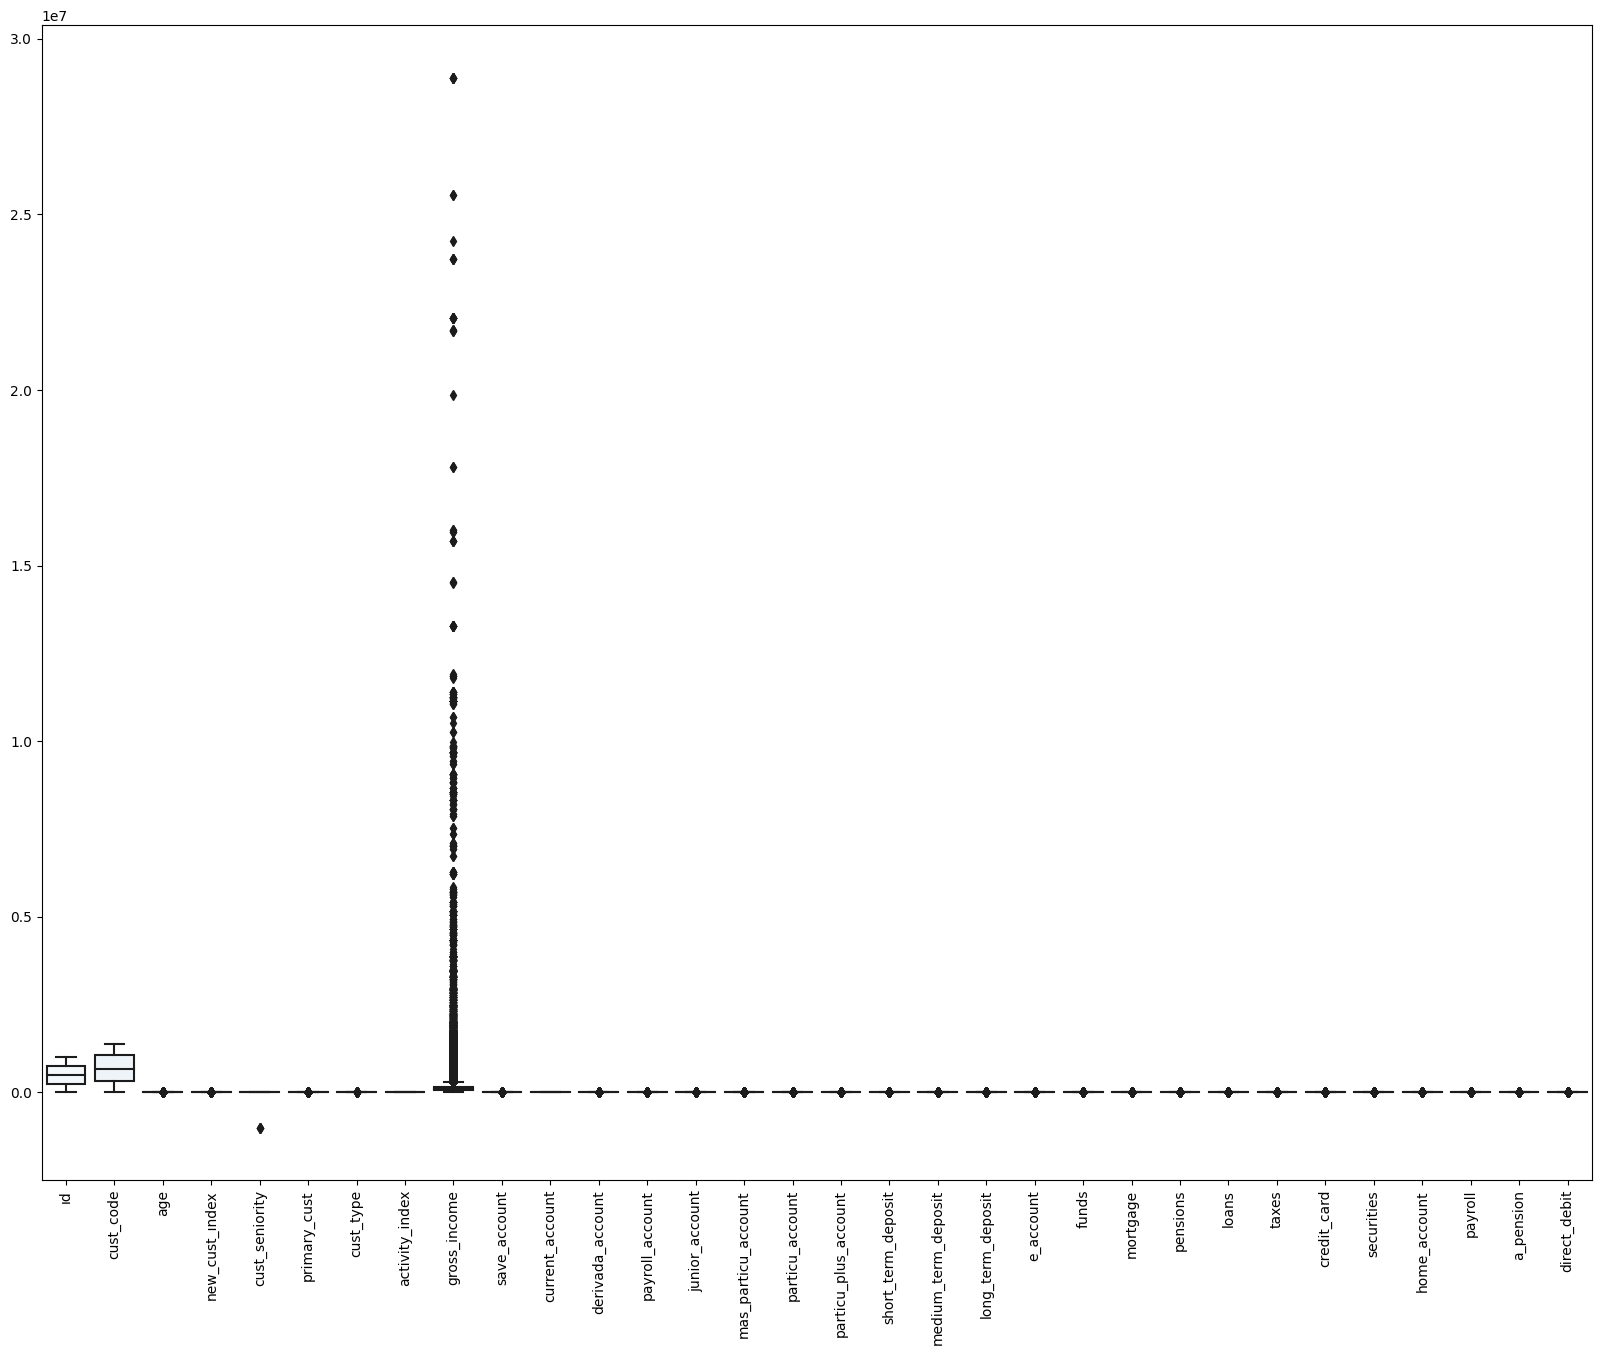

In [61]:
#outliers values
plt.figure(figsize=(20,15))
ax=sns.boxplot(data = data, palette='BuPu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [62]:
numeric_value = data.select_dtypes(exclude="object")
numeric_value.shape

(1000000, 34)

In [63]:
numeric_list=['gross_income']

In [64]:
#detecting outliers
for variables in numeric_list:
   q1= numeric_value[variables].quantile(.25)
   q3 =numeric_value[variables].quantile(.75)
   med=np.median(numeric_value[variables])
   iqr = q3 - q1

   lower_limit = q1 - (1.5 * iqr)
   upper_limit = q3 + (1.5 * iqr)

   outliers=numeric_value.index[(numeric_value[variables]>upper_limit) | (numeric_value[variables]<lower_limit)]

   #outliers suppression
   outliers = (numeric_value[variables] < (lower_limit))
   outliers = (numeric_value[variables] > (upper_limit))

   numeric_value[outliers] = lower_limit
   numeric_value[outliers] = upper_limit

In [65]:
unique_value = data.nunique()
print("Number of unique values:\n{}".format(unique_value))

Number of unique values:
ıd                          1000000
fecha_dato                        2
cust_code                    626159
employee_index                    5
custom_country_residence        113
sexo                              2
age                             114
date_regist                       2
new_cust_ındex                    2
cust_seniority                  248
primary_cust                      2
cust_type                         3
cust_relation_type                3
residence_index                   2
foreigner_index                   2
channel                         156
deceased_index                    2
addres_type                       1
cod_prov                         52
province_name                    52
activity_index                    2
gross_income                 543335
save_account                      2
current_account                   2
derivada_account                  2
payroll_account                   2
junior_account                    2
mas

In [66]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
employee_index : ['N' 'A' 'B' 'F' 'S']
custom_country_residence : ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
sexo : ['H' 'V']
cust_relation_type : ['A' 'I' 'P']
residence_index : ['Yes' 'No']
foreigner_index : ['No' 'Yes']
channel : ['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' 'KAZ' 'RED' 'KHC' 'KHK' 'KGN' 'KHM'
 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF' 'KFK' 'KHN' 'KHA' 'KAF' 'KGX'
 'KFD' 'KAG' 'KFG' 'KAB' 'KCC' 'KAE' 'KAH' 'KAR

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ıd,1000000.0,499999.500000,288675.278932,0.00,249999.750,499999.500,749999.25,999999.00
cust_code,1000000.0,690596.670395,404408.432011,15889.00,336411.000,664476.000,1074511.25,1379131.00
age,1000000.0,43.266717,17.065626,2.00,27.000,43.000,53.00,116.00
new_cust_ındex,1000000.0,0.000496,0.022266,0.00,0.000,0.000,0.00,1.00
cust_seniority,1000000.0,93.092962,2001.260509,-999999.00,33.000,95.000,156.00,246.00
primary_cust,1000000.0,1.109172,3.269090,1.00,1.000,1.000,1.00,99.00
cust_type,1000000.0,1.000088,0.013191,1.00,1.000,1.000,1.00,3.00
activity_index,1000000.0,0.565418,0.495702,0.00,0.000,1.000,1.00,1.00
gross_income,1000000.0,139104.619678,229305.904692,1202.73,73622.835,108048.495,162324.30,28894395.51
save_account,1000000.0,0.000177,0.013303,0.00,0.000,0.000,0.00,1.00
